### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
#Turning off warnings
options(warn=-1)

In [2]:
#Import csv files
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
#Visual check of the data
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [6]:
#Load the dplyr library for join operations
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
#Create a list of the datasets by city name
cities = list(ny = 'New York', chi = 'Chicago', wash = 'Washington')

In [8]:
#Create a function to mutate our datasets
add_city = function(data, city_name){
    mutate(data, City = city_name)
}

In [9]:
#Loop through all datasets and apply the add_city function
for (dataset_name in names(cities)){
    assign(
        dataset_name, add_city(get(dataset_name), cities[[dataset_name]])
    )
}

In [10]:
#Join the first two datasets
temp = bind_rows(ny, chi)

In [11]:
#Visually inspect the data
head(temp)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [12]:
tail(temp)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
63395,397518,2017-03-24 16:52:16,2017-03-24 16:57:57,341,Southport Ave & Waveland Ave,Southport Ave & Waveland Ave,Subscriber,Male,1990,Chicago
63396,879494,2017-05-18 05:06:50,2017-05-18 05:22:10,920,Artesian Ave & Hubbard St,Wacker Dr & Washington St,Subscriber,Male,1959,Chicago
63397,360389,2017-03-19 07:21:29,2017-03-19 07:27:18,349,Wabash Ave & Roosevelt Rd,Wells St & Polk St,Subscriber,Male,1987,Chicago
63398,858496,2017-05-16 17:03:24,2017-05-16 17:31:12,1668,Ashland Ave & Harrison St,Wells St & Concord Ln,Subscriber,Male,1963,Chicago
63399,777620,2017-05-10 08:53:03,2017-05-10 08:54:32,89,Western Ave & Leland Ave,Western Ave & Leland Ave,Subscriber,Male,1977,Chicago
63400,1230561,2017-06-11 14:52:13,2017-06-11 15:42:33,3020,Waba,,,,NA,Chicago


In [13]:
#Programatically check the data
dim(temp)

[1] 63400    10

In [14]:
#Insert Gender column to wash dataset
wash$Gender = NA

In [15]:
#Insert Birth.Year column to wash dataset
wash$Birth.Year = NA

In [16]:
#Join wash to the temp dataset for a master dataset containing all of the records
final = bind_rows(temp, wash)

In [17]:
#Visually inspect the new dataset
head(final)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [18]:
tail(final)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
152446,1484340,2017-06-10 10:58:09,2017-06-10 11:25:58,1669.700,M St & New Jersey Ave SE,4th St & Madison Dr NW,Customer,NA,NA,Washington
152447,555788,2017-03-22 18:46:00,2017-03-22 19:04:00,1082.789,8th & H St NW,21st & I St NW,Subscriber,NA,NA,Washington
152448,739004,2017-04-09 04:00:22,2017-04-09 04:09:54,571.879,Eckington Pl & Q St NE,Columbus Circle / Union Station,Subscriber,NA,NA,Washington
152449,1214907,2017-05-19 09:00:53,2017-05-19 09:07:38,404.152,1st & M St NE,1st & Rhode Island Ave NW,Subscriber,NA,NA,Washington
152450,1419806,2017-06-06 04:27:33,2017-06-06 04:49:59,1345.911,10th & Florida Ave NW,Georgetown Harbor / 30th St NW,Customer,NA,NA,Washington
152451,132,,,NA,,,,NA,NA,Washington


In [19]:
#Programatically inspect the data
dim(final)

[1] 152451     10

### Question 1


Which age group uses the bikeshare service most frequently?

In [20]:
#Create a new dataframe that filters out outliers, na and infinite values
birth_filtered = temp %>% filter(Birth.Year >=1940 &
                               !is.infinite(Birth.Year) &
                               !is.na(Birth.Year))

In [21]:
#Check to see if our filters worked
dim(birth_filtered)

[1] 56375    10

In [22]:
head(birth_filtered)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


In [23]:
tail(birth_filtered)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
56370,7087,2017-01-03 17:35:11,2017-01-03 17:41:46,395,Millennium Park,Indiana Ave & Roosevelt Rd,Subscriber,Male,1976,Chicago
56371,397518,2017-03-24 16:52:16,2017-03-24 16:57:57,341,Southport Ave & Waveland Ave,Southport Ave & Waveland Ave,Subscriber,Male,1990,Chicago
56372,879494,2017-05-18 05:06:50,2017-05-18 05:22:10,920,Artesian Ave & Hubbard St,Wacker Dr & Washington St,Subscriber,Male,1959,Chicago
56373,360389,2017-03-19 07:21:29,2017-03-19 07:27:18,349,Wabash Ave & Roosevelt Rd,Wells St & Polk St,Subscriber,Male,1987,Chicago
56374,858496,2017-05-16 17:03:24,2017-05-16 17:31:12,1668,Ashland Ave & Harrison St,Wells St & Concord Ln,Subscriber,Male,1963,Chicago
56375,777620,2017-05-10 08:53:03,2017-05-10 08:54:32,89,Western Ave & Leland Ave,Western Ave & Leland Ave,Subscriber,Male,1977,Chicago


In [24]:
min_value = min(birth_filtered$Birth.Year, na.rm = TRUE)
max_value = max(birth_filtered$Birth.Year, na.rm = TRUE)

print(min_value)
print(max_value)

[1] 1940
[1] 2002


In [25]:
#Import the ggplot library
library(ggplot2)

In [26]:
#Summary statistics for the birth year of all riders
summary(birth_filtered$Birth.Year)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1940    1970    1981    1979    1988    2002 

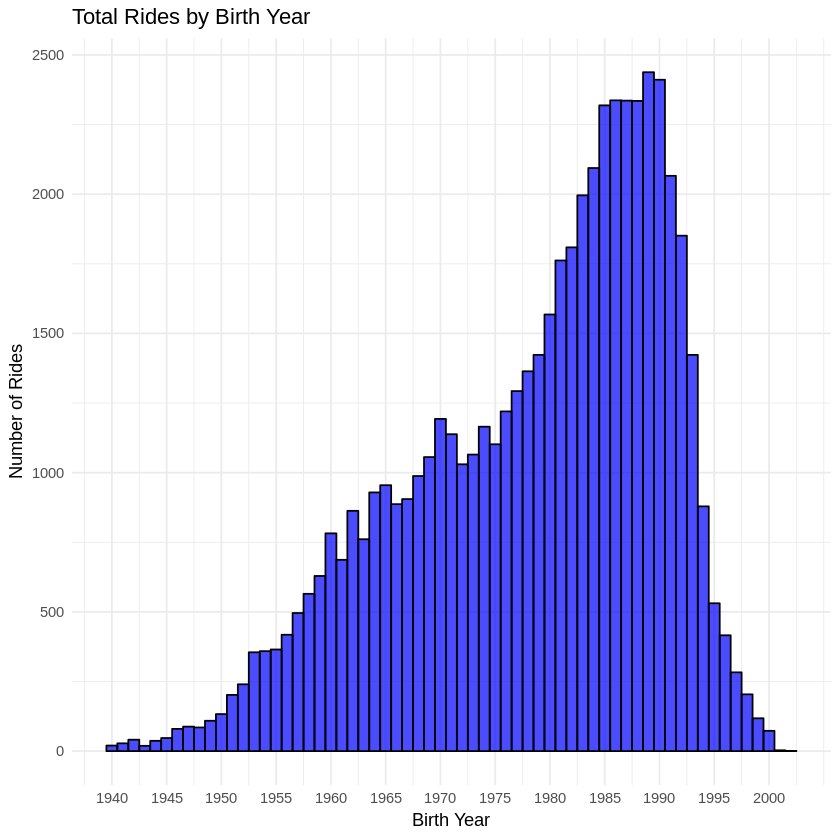

In [27]:
#Create a histogram to show the total rides by birth year over all datasets, excluding outliers. 
ggplot(birth_filtered, aes(x = Birth.Year)) + 
  geom_histogram(binwidth = 1, fill = 'blue', color = 'black', alpha = 0.7) +
  labs(title = 'Total Rides by Birth Year', x = 'Birth Year', y = 'Number of Rides') +
  theme_minimal()+
  scale_x_continuous(breaks = seq(min(birth_filtered$Birth.Year), 
                                  max(birth_filtered$Birth.Year), by = 5))

In [28]:
#Create a list of cities linked to the datasets
birth_cities = list(ny = 'New York', chi = 'Chicago')

In [29]:
#Create a function to display summary data by city
city.summary = function(data, city_list, col){
    for(city_name in names(city_list)){
      city_value = city_list[city_name]
  
      sum_data = data %>%
      filter(City == city_value)
  
      print(paste('Summary for', city_value))
      print(summary(sum_data[[col]]))
    }
}

In [30]:
#Print summary data for birth year in each city
city.summary(birth_filtered, birth_cities, 'Birth.Year')

[1] "Summary for New York"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1940    1970    1981    1978    1988    2001 
[1] "Summary for Chicago"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1940    1975    1984    1981    1989    2002 


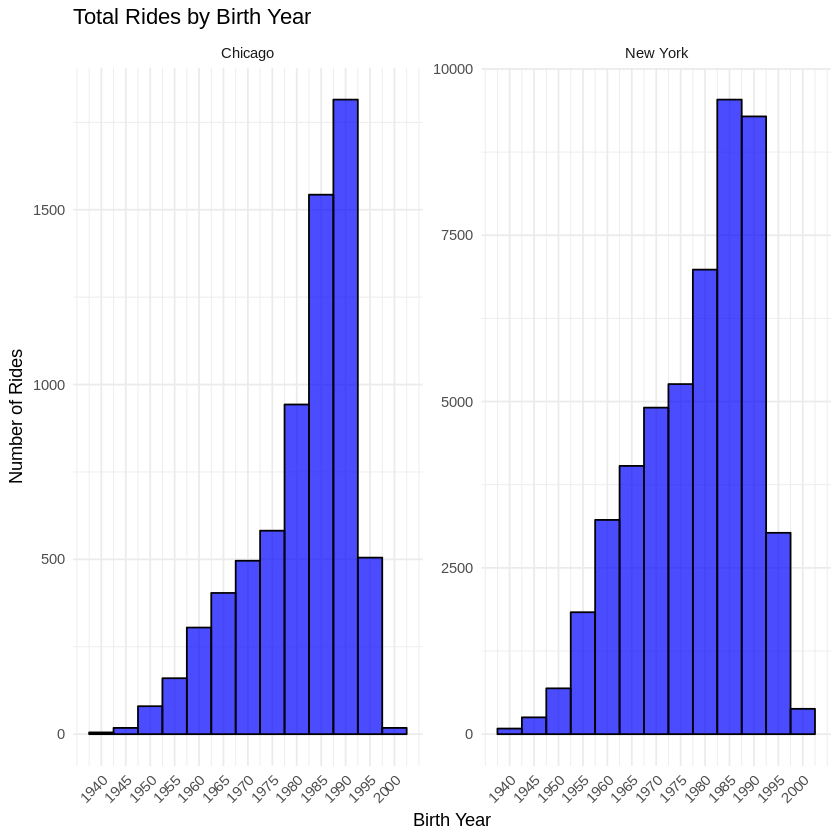

In [32]:
#Create histograms showing the same data, but seperated by city
ggplot(birth_filtered, aes(x = Birth.Year)) + 
  geom_histogram(binwidth = 5, fill = 'blue', color = 'black', alpha = 0.7) +
  labs(title = 'Total Rides by Birth Year', x = 'Birth Year', y = 'Number of Rides') +
  theme_minimal()+
  facet_wrap(~City, scales = 'free')+
  scale_x_continuous(breaks = seq(min(birth_filtered$Birth.Year, na.rm = TRUE), 
                                max(birth_filtered$Birth.Year, na.rm = TRUE), by = 5))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


** As we can see in the graphs and our summary data, the majority of users were born between 1980 and 1990. There is clearly a drop off for users born after 1990. We can use this data to see where we should target marketing efforts. **

### Question 2

Do subscribers or customers ride more frequently?

In [33]:
#Check for erroneous values
table(final$User.Type)


             Customer Subscriber 
       121      30754     121576 

In [34]:
#Filter out these values
user_filtered = subset(final, User.Type == 'Customer' | User.Type == 'Subscriber')

In [35]:
#Drop levels of unused data
user_filtered$User.Type = droplevels(user_filtered$User.Type)

In [36]:
#Check for erroneous values
table(user_filtered$User.Type)


  Customer Subscriber 
     30754     121576 

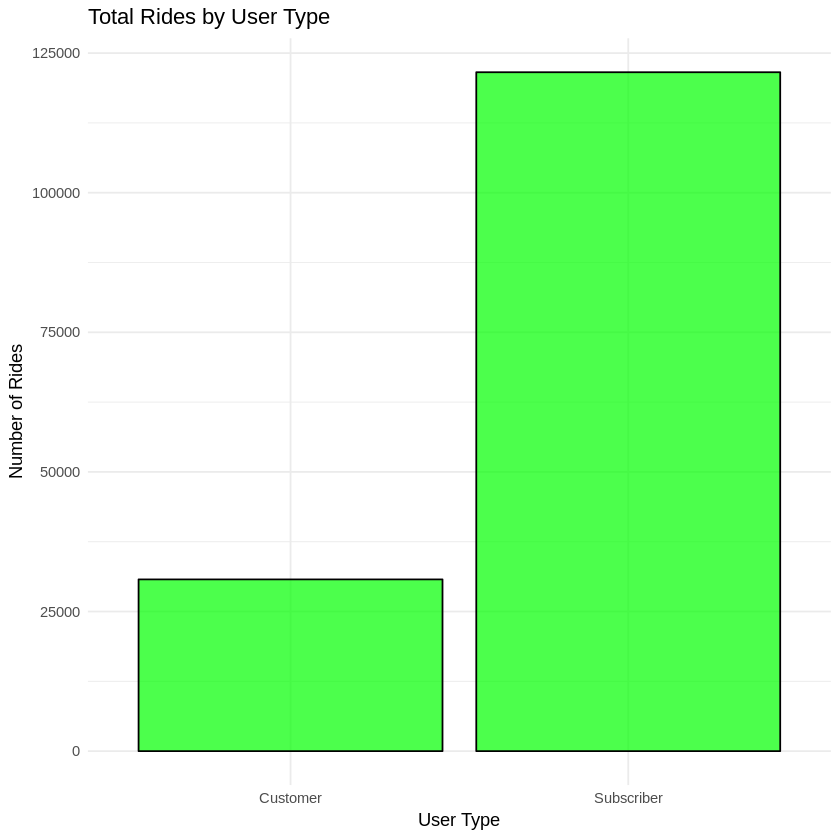

In [37]:
#Create a bar chart showing total rides by user type
ggplot(user_filtered, aes(x = User.Type)) + 
  geom_bar(fill = 'green', color = 'black', alpha = 0.7) +
  labs(title = 'Total Rides by User Type', x = 'User Type', y = 'Number of Rides') +
  theme_minimal()

In [38]:
city.summary(user_filtered, cities, 'User.Type')

[1] "Summary for New York"
  Customer Subscriber 
      5558      49093 
[1] "Summary for Chicago"
  Customer Subscriber 
      1746       6883 
[1] "Summary for Washington"
  Customer Subscriber 
     23450      65600 


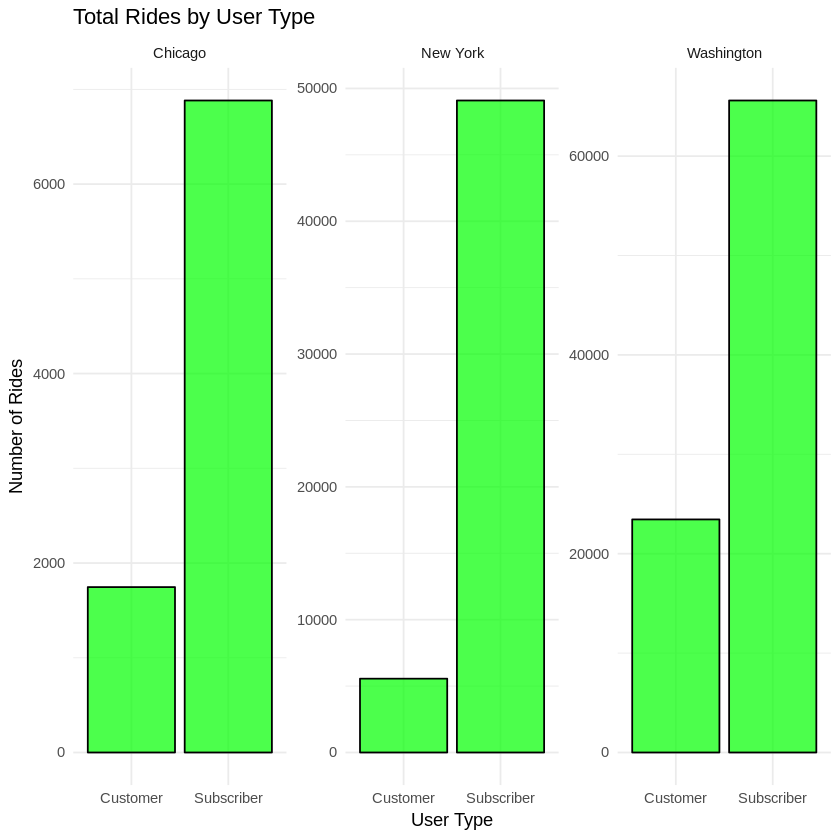

In [39]:
#Create the same chart seperated by city
ggplot(user_filtered, aes(x = User.Type)) + 
  geom_bar(fill = 'green', color = 'black', alpha = 0.7) +
  labs(title = 'Total Rides by User Type', x = 'User Type', y = 'Number of Rides') +
  theme_minimal()+
  facet_wrap(~City, scales = 'free')

** With this data we can see that most trips are taken by subscribers. Using this as a benchmark we can find ways going forward to increase our subscription rate. **

### Question 3

** What is the average travel time for users? **

In [40]:
#Check the data
summary(final$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     60     392     667    1098    1159 1088634       2 

In [41]:
#Drop the extreme outliers and the NA values
trip_filtered = subset(final, Trip.Duration <= 7200 & !is.na(Trip.Duration))

In [42]:
#Check the data
summary(trip_filtered$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   390.0   660.0   920.1  1136.3  7199.2 

In [43]:
#Convert trip duration from seconds to minutes
trip_filtered$Trip.Duration = trip_filtered$Trip.Duration / 60

In [44]:
#Check the data
summary(trip_filtered$Trip.Duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.499  11.000  15.335  18.938 119.987 

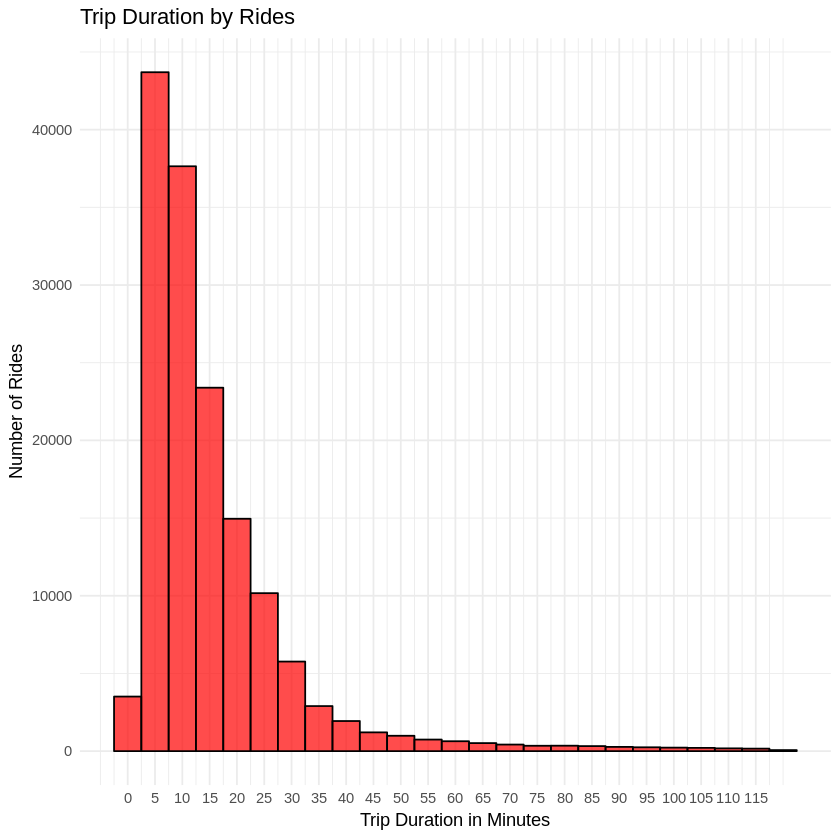

In [45]:
#Create a histogram to show the trip duration by users over all datasets, excluding outliers. 
ggplot(trip_filtered, aes(x = Trip.Duration)) + 
  geom_histogram(binwidth = 5, fill = 'red', color = 'black', alpha = 0.7) +
  labs(title = 'Trip Duration by Rides', x = 'Trip Duration in Minutes', y = 'Number of Rides') +
  theme_minimal()+
  scale_x_continuous(breaks = seq(0, max(trip_filtered$Trip.Duration), by = 5))

In [46]:
city.summary(trip_filtered, cities, 'Trip.Duration')

[1] "Summary for New York"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.017   6.133  10.133  13.291  17.383 119.917 
[1] "Summary for Chicago"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.567  11.100  14.422  18.483 117.617 
[1] "Summary for Washington"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.005   6.785  11.607  16.696  19.938 119.987 


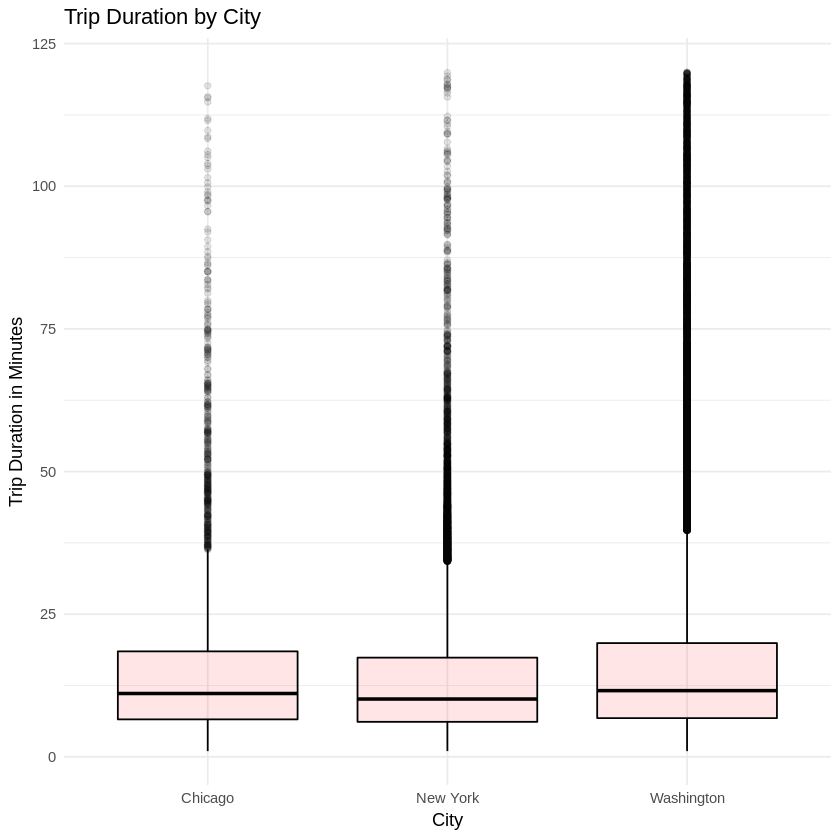

In [47]:
#Create a box plot to visualize trip duration by city
ggplot(trip_filtered, aes(x = City, y = Trip.Duration)) + 
  geom_boxplot(fill = 'red', color = 'black', alpha = 0.1) +
  labs(title = 'Trip Duration by City', x = 'City', y = 'Trip Duration in Minutes') +
  theme_minimal()

** We can see that the average ride time between all cities is around 15 minutes. You can use this data to help plan out future or change existing locaitons for the bike stations. Knowing that riders don't often travel past a certain amount of time, we can more efficietnly place bike stations. **


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')